In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

In [2]:
bird = pd.read_csv('Bird_df.csv')
bird.head()

,Unnamed: 0,File,Covariance_l,Correlation_l,Var(x)_l,Var(y)_l,Angle1_l,Angle2_l,Covariance_c,Correlation_c,...,Var(y)_sx,Angle1_sx,Angle2_sx,Covariance_sy,Correlation_sy,Var(x)_sy,Var(y)_sy,Angle1_sy,Angle2_sy,BIRD
0,0,100_0.JPG,20.100772,0.004853,4048.689360,4224.828254,83.580110,-6.419890,NaN,NaN,...,4108.540380,9.006279,-80.993721,-6.068200,-0.001482,4074.833974,4114.828432,-81.560078,8.439922,0
1,1,100_1.JPG,-1141.668144,-0.429730,3473.922202,2020.861100,-28.729291,61.270709,-1140.384774,-0.490270,...,4249.555354,-62.932006,27.067994,-5.923777,-0.001416,4207.293718,4159.928254,-7.021329,82.978671,1
2,2,10_0.JPG,NaN,NaN,NaN,NaN,90.000000,0.000000,NaN,NaN,...,4170.164086,-20.203215,69.796785,-65.106128,-0.015316,4225.255235,4276.129893,-55.670907,34.329093,0
3,3,10_1.JPG,-147.874141,-0.331720,199.638856,974.980551,-79.658986,10.341014,15.326974,0.139922,...,4242.634387,82.480892,-7.519108,-45.983258,-0.011131,3953.849760,4315.553600,-82.867472,7.132528,1
4,4,11_0.JPG,-822.860804,-0.209647,3609.696355,4236.360861,-55.458287,34.541713,-1978.621807,-0.996255,...,4123.074648,40.309308,-49.690692,49.454644,0.012113,4081.770734,4083.444676,45.484811,-44.515189,0


In [3]:
bird.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
bird.drop('File',axis=1,inplace=True)

In [5]:
bird.head(2)

,Covariance_l,Correlation_l,Var(x)_l,Var(y)_l,Angle1_l,Angle2_l,Covariance_c,Correlation_c,Var(x)_c,Var(y)_c,...,Var(y)_sx,Angle1_sx,Angle2_sx,Covariance_sy,Correlation_sy,Var(x)_sy,Var(y)_sy,Angle1_sy,Angle2_sy,BIRD
0,20.100772,0.004853,4048.689360,4224.828254,83.580110,-6.419890,NaN,NaN,NaN,NaN,...,4108.540380,9.006279,-80.993721,-6.068200,-0.001482,4074.833974,4114.828432,-81.560078,8.439922,0
1,-1141.668144,-0.429730,3473.922202,2020.861100,-28.729291,61.270709,-1140.384774,-0.49027,3136.6043,1720.344737,...,4249.555354,-62.932006,27.067994,-5.923777,-0.001416,4207.293718,4159.928254,-7.021329,82.978671,1


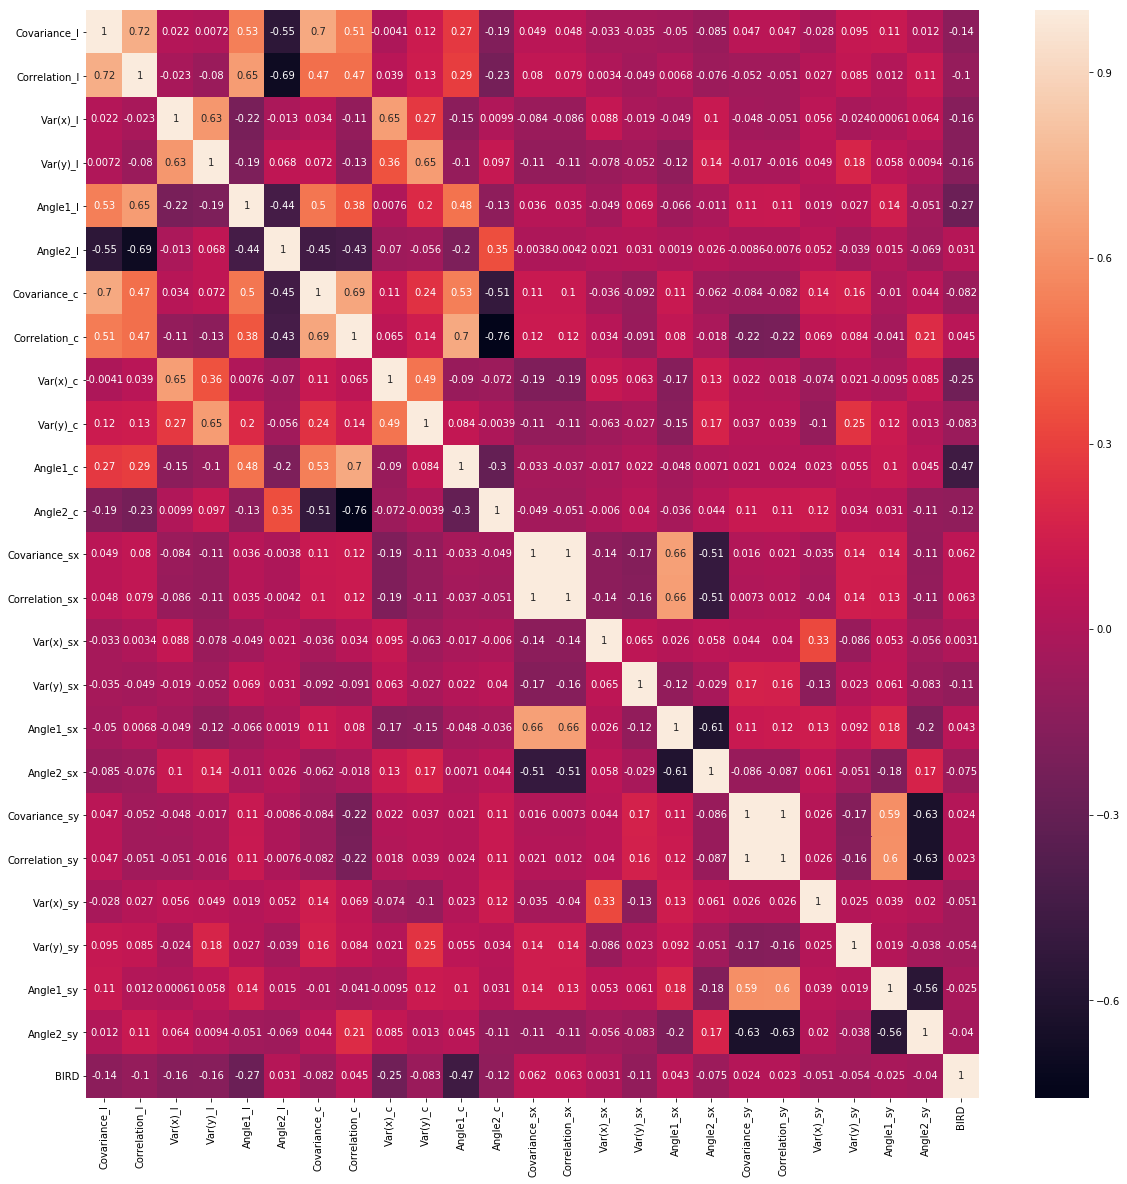

In [7]:
plt.figure(figsize = (20,20))
sns.heatmap(bird.corr(),annot=True)

## Data Preprocessing

In [8]:
bird.isnull().sum()

Covariance_l      28
Correlation_l     29
Var(x)_l          13
Var(y)_l          13
Angle1_l           0
Angle2_l           0
Covariance_c      88
Correlation_c     89
Var(x)_c          88
Var(y)_c          88
Angle1_c           0
Angle2_c           0
Covariance_sx      0
Correlation_sx     0
Var(x)_sx          0
Var(y)_sx          0
Angle1_sx          0
Angle2_sx          0
Covariance_sy      0
Correlation_sy     0
Var(x)_sy          0
Var(y)_sy          0
Angle1_sy          0
Angle2_sy          0
BIRD               0
dtype: int64

In [9]:
bird.fillna(0,inplace=True)

In [10]:
bird.isnull().sum()

Covariance_l      0
Correlation_l     0
Var(x)_l          0
Var(y)_l          0
Angle1_l          0
Angle2_l          0
Covariance_c      0
Correlation_c     0
Var(x)_c          0
Var(y)_c          0
Angle1_c          0
Angle2_c          0
Covariance_sx     0
Correlation_sx    0
Var(x)_sx         0
Var(y)_sx         0
Angle1_sx         0
Angle2_sx         0
Covariance_sy     0
Correlation_sy    0
Var(x)_sy         0
Var(y)_sy         0
Angle1_sy         0
Angle2_sy         0
BIRD              0
dtype: int64

In [12]:
bird.shape

(200, 25)

In [13]:
# Independent Variale
X = bird.iloc[:,:-1] # independent variable
y = bird.iloc[:,-1:] # dependent variables


In [14]:
# split the data into traning and test set 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print('x_train =',x_train.shape)
print('x_test =',x_test.shape)
print('y_train =',y_train.shape)
print('y_test =',y_test.shape)

x_train = (160, 24)
x_test = (40, 24)
y_train = (160, 1)
y_test = (40, 1)


In [15]:
degreeoffreedom = 160-1-(24-1)

In [16]:
from scipy.stats import chi2

In [17]:
model = sm.GLM(y_train,x_train,family=sm.families.Binomial()).fit()
print(model.summary())
print('INFO: Null deviance =',model.null_deviance)
print('INFO: Residual deviance =',model.deviance)
print('INFO: Critical Value of chi2 =',chi2.ppf(0.95,degreeoffreedom))
print('INFO: Pearson chi2 =',model.pearson_chi2)
print('INFO: P-value chi2 =',1-chi2.cdf(model.pearson_chi2,degreeoffreedom))
print('INFO: AIC =',model.aic)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   BIRD   No. Observations:                  160
Model:                            GLM   Df Residuals:                      136
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -62.622
Date:                Thu, 04 Apr 2019   Deviance:                       125.24
Time:                        17:31:38   Pearson chi2:                     165.
No. Iterations:                     6   Covariance Type:             nonrobust
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Covariance_l      -0.0003      0.000     -0.727      0.467      -0.001       0.000
Correlation_l      1.2231      1.023    

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [19]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [20]:
vif

,VIF Factor,features
0,2.433788,Covariance_l
1,3.239985,Correlation_l
2,7.677855,Var(x)_l
3,7.613828,Var(y)_l
4,2.378188,Angle1_l
5,2.309633,Angle2_l
6,2.520815,Covariance_c
7,4.589129,Correlation_c
8,3.832520,Var(x)_c
9,3.590277,Var(y)_c


In [21]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)
from sklearn.feature_selection import RFE

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
selector = RFE(logmodel)
selector.fit(x_train,y_train)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
  n_features_to_select=None, step=1, verbose=0)

In [23]:
selector.ranking_

array([ 9,  1,  2,  7,  1,  8, 10,  1,  4,  3,  1,  1, 12,  6,  1,  1,  1,
        1,  1, 11,  5,  1, 13,  1])

In [24]:
X.columns[selector.support_]

Index(['Correlation_l', 'Angle1_l', 'Correlation_c', 'Angle1_c', 'Angle2_c',
       'Var(x)_sx', 'Var(y)_sx', 'Angle1_sx', 'Angle2_sx', 'Covariance_sy',
       'Var(y)_sy', 'Angle2_sy'],
      dtype='object')

In [25]:
names = bird.keys()
print(sorted(zip(map(lambda x: round(x, 4), selector.ranking_), names)))

[(1, 'Angle1_c'), (1, 'Angle1_l'), (1, 'Angle1_sx'), (1, 'Angle2_c'), (1, 'Angle2_sx'), (1, 'Angle2_sy'), (1, 'Correlation_c'), (1, 'Correlation_l'), (1, 'Covariance_sy'), (1, 'Var(x)_sx'), (1, 'Var(y)_sx'), (1, 'Var(y)_sy'), (2, 'Var(x)_l'), (3, 'Var(y)_c'), (4, 'Var(x)_c'), (5, 'Var(x)_sy'), (6, 'Correlation_sx'), (7, 'Var(y)_l'), (8, 'Angle2_l'), (9, 'Covariance_l'), (10, 'Covariance_c'), (11, 'Correlation_sy'), (12, 'Covariance_sx'), (13, 'Angle1_sy')]


# Build model with selected columns


In [26]:
X_new = X[X.columns[selector.support_]]
X_new.head()

,Correlation_l,Angle1_l,Correlation_c,Angle1_c,Angle2_c,Var(x)_sx,Var(y)_sx,Angle1_sx,Angle2_sx,Covariance_sy,Var(y)_sy,Angle2_sy
0,0.004853,83.580110,0.000000,90.000000,0.000000,4171.049257,4108.540380,9.006279,-80.993721,-6.068200,4114.828432,8.439922
1,-0.429730,-28.729291,-0.490270,-29.063639,60.936361,3983.028610,4249.555354,-62.932006,27.067994,-5.923777,4159.928254,82.978671
2,0.000000,90.000000,0.000000,90.000000,0.000000,4263.861936,4170.164086,-20.203215,69.796785,-65.106128,4276.129893,34.329093
3,-0.331720,-79.658986,0.139922,47.033341,-42.966659,4175.925681,4242.634387,82.480892,-7.519108,-45.983258,4315.553600,7.132528
4,-0.209647,-55.458287,-0.996255,-38.875799,51.124201,4140.591090,4123.074648,40.309308,-49.690692,49.454644,4083.444676,-44.515189


In [27]:
x_train, x_test, y_train, y_test = train_test_split(X_new,y,test_size=0.2,random_state=0)
print('x_train =',x_train.shape)
print('x_test =',x_test.shape)
print('y_train =',y_train.shape)
print('y_test =',y_test.shape)

x_train = (160, 12)
x_test = (40, 12)
y_train = (160, 1)
y_test = (40, 1)


In [28]:
model = sm.GLM(y_train,x_train,family=sm.families.Binomial()).fit()
print(model.summary())
print('INFO: Null deviance =',model.null_deviance)
print('INFO: Residual deviance =',model.deviance)
print('INFO: Critical Value of chi2 =',chi2.ppf(0.95,degreeoffreedom))
print('INFO: Pearson chi2 =',model.pearson_chi2)
print('INFO: P-value chi2 =',1-chi2.cdf(model.pearson_chi2,degreeoffreedom))
print('INFO: AIC =',model.aic)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   BIRD   No. Observations:                  160
Model:                            GLM   Df Residuals:                      148
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -76.842
Date:                Thu, 04 Apr 2019   Deviance:                       153.68
Time:                        17:31:43   Pearson chi2:                     181.
No. Iterations:                     5   Covariance Type:             nonrobust
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Correlation_l     0.0572      0.584      0.098      0.922      -1.087       1.201
Angle1_l         -0.0056      0.005     -1.

In [29]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif["features"] = x_train.columns
vif[vif['VIF Factor'] < 5]

,VIF Factor,features
0,1.516686,Correlation_l
1,1.825496,Angle1_l
2,2.817620,Correlation_c
3,2.433086,Angle1_c
4,2.324629,Angle2_c
7,1.716852,Angle1_sx
8,1.622924,Angle2_sx
9,1.958554,Covariance_sy
11,1.846908,Angle2_sy


# Confusion Matrix for traning and testing data

In [30]:
def convertclass(y):
    if y >= 0.5:
        return 1
    else:
        return 0

In [31]:
y_pred_train_prob = model.predict(x_train)
y_pred_test_prob = model.predict(x_test)
# get class
y_pred_train_class = y_pred_train_prob.apply(convertclass)
y_pred_test_class = y_pred_test_prob.apply(convertclass)

In [32]:
from pandas_ml import ConfusionMatrix
cm_train = ConfusionMatrix(y_train['BIRD'],y_pred_train_class)
cm_test = ConfusionMatrix(y_test['BIRD'],y_pred_test_class)

In [33]:
print('INFO: Confusion Matrix for Traning Data \n\n',cm_train,'\n\n')
print('INFO: Confusion Matrix for Testing Data \n\n',cm_test)

INFO: Confusion Matrix for Traning Data 

 Predicted  False  True  __all__
Actual                         
False         67    13       80
True          18    62       80
__all__       85    75      160 


INFO: Confusion Matrix for Testing Data 

 Predicted  False  True  __all__
Actual                         
False         15     5       20
True           9    11       20
__all__       24    16       40


In [34]:
print('For Traning Data')
cm_train.stats_overall

For Traning Data


C:\Users\USER\Anaconda3\lib\site-packages\pandas_ml\confusion_matrix\stats.py:60: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2


OrderedDict([('Accuracy', 0.80625),
             ('95% CI', (0.7364051969575262, 0.8643970661154117)),
             ('No Information Rate', 'ToDo'),
             ('P-Value [Acc > NIR]', 3.622444408367715e-13),
             ('Kappa', 0.6125),
             ("Mcnemar's Test P-Value", 'ToDo')])

In [35]:
print('For Testing Data')
cm_test.stats_overall

C:\Users\USER\Anaconda3\lib\site-packages\pandas_ml\confusion_matrix\stats.py:60: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2


For Testing Data


OrderedDict([('Accuracy', 0.65),
             ('95% CI', (0.4831555463510094, 0.7937175091292331)),
             ('No Information Rate', 'ToDo'),
             ('P-Value [Acc > NIR]', 0.3174251602390343),
             ('Kappa', 0.30000000000000004),
             ("Mcnemar's Test P-Value", 'ToDo')])

# Data is not *Biased* towards one class

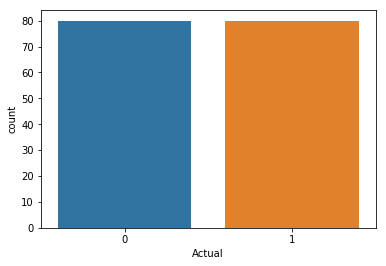

In [36]:
sns.countplot(x='BIRD',data=y_train)

1    80
0    80
Name: Actual, dtype: int64
0.5


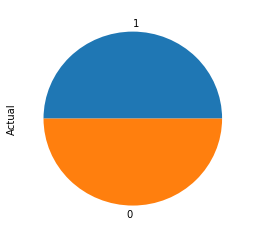

In [37]:
plt.figure(figsize=(4,4))
y_train['BIRD'].value_counts().plot(kind='pie')
print(y_train['BIRD'].value_counts())
print(80/(80+80))

# ROC and AUC

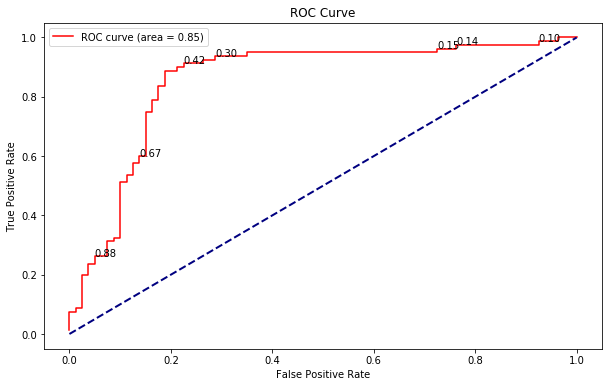

In [38]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,threshold = roc_curve(y_train,y_pred_train_prob)

plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,color='red',lw=1.5)
plt.plot([0, 1], [0, 1], color='navy',lw = 2, linestyle='--')

for i,value in enumerate(fpr*10):
    try:
        if (round(fpr[i+1]*10) - round(fpr[i]*10)) == 1:
            plt.text(fpr[i],tpr[i],'%0.2f'%(threshold[i]))
    except IndexError:
        print(' ')
        
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(['ROC curve (area = %0.2f)' % auc(fpr,tpr)])
plt.show()

**From ROC the resonable threshold vale that can be taken into accout is p = 0.41 **

In [39]:
def convertclass(y):
    if y >= 0.41:
        return 1
    else:
        return 0

In [40]:
y_pred_train_prob = model.predict(x_train)
y_pred_test_prob = model.predict(x_test)
# get class
y_pred_train_class = y_pred_train_prob.apply(convertclass)
y_pred_test_class = y_pred_test_prob.apply(convertclass)

from pandas_ml import ConfusionMatrix
cm_train = ConfusionMatrix(y_train['BIRD'],y_pred_train_class)
cm_test = ConfusionMatrix(y_test['BIRD'],y_pred_test_class)

print('INFO: Confusion Matrix for Traning Data \n\n',cm_train,'\n\n')
print('INFO: Confusion Matrix for Testing Data \n\n',cm_test)

INFO: Confusion Matrix for Traning Data 

 Predicted  False  True  __all__
Actual                         
False         62    18       80
True           7    73       80
__all__       69    91      160 


INFO: Confusion Matrix for Testing Data 

 Predicted  False  True  __all__
Actual                         
False         14     6       20
True           6    14       20
__all__       20    20       40


In [41]:
print('For Traning Data')
cm_train.stats_overall

For Traning Data


C:\Users\USER\Anaconda3\lib\site-packages\pandas_ml\confusion_matrix\stats.py:60: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2


OrderedDict([('Accuracy', 0.84375),
             ('95% CI', (0.7780437736406798, 0.896258245003909)),
             ('No Information Rate', 'ToDo'),
             ('P-Value [Acc > NIR]', 8.998683542650651e-14),
             ('Kappa', 0.6875),
             ("Mcnemar's Test P-Value", 'ToDo')])

In [42]:
print('For Testing Data')
cm_test.stats_overall

For Testing Data


C:\Users\USER\Anaconda3\lib\site-packages\pandas_ml\confusion_matrix\stats.py:60: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2


OrderedDict([('Accuracy', 0.7),
             ('95% CI', (0.5346837147458766, 0.8343727956067644)),
             ('No Information Rate', 'ToDo'),
             ('P-Value [Acc > NIR]', 0.008294501687487356),
             ('Kappa', 0.3999999999999999),
             ("Mcnemar's Test P-Value", 'ToDo')])

# Prediction

In [43]:
bird_final = pd.read_csv('Bird_Test_df.csv')
bird_final.head()

,Unnamed: 0,File,Covariance_l,Correlation_l,Var(x)_l,Var(y)_l,Angle1_l,Angle2_l,Covariance_c,Correlation_c,...,Var(y)_sx,Angle1_sx,Angle2_sx,Covariance_sy,Correlation_sy,Var(x)_sy,Var(y)_sy,Angle1_sy,Angle2_sy,BIRD
0,0,0000.JPG,-119.309524,-0.111133,1826.252626,617.309262,-5.522878,84.477122,-156.516393,-0.765936,...,4110.813800,17.197175,-72.802825,-89.337483,-0.021536,4143.388171,4152.939747,-46.530068,43.469932,NaN
1,1,0001.JPG,NaN,NaN,0.000000,0.000000,90.000000,0.000000,NaN,NaN,...,4071.638524,13.395357,-76.604643,42.900652,0.010305,4220.464601,4106.284664,18.461044,-71.538956,NaN
2,2,0002.JPG,222.845096,0.340547,976.981257,433.091695,19.582650,-70.417350,309.390849,0.436732,...,4331.129008,-58.730550,31.269450,-30.675745,-0.007475,4007.670990,4202.162552,-81.246540,8.753460,NaN
3,3,0003.JPG,-883.860764,-0.857953,1450.058175,726.649565,-33.835787,56.164213,-954.463821,-0.897891,...,3416.439797,-11.717441,78.282559,164.461181,0.043017,3822.838311,3823.097507,45.022576,-44.977424,NaN
4,4,0004.JPG,NaN,NaN,0.000000,0.000000,90.000000,0.000000,NaN,NaN,...,3984.467732,3.546779,-86.453221,86.353940,0.021646,4001.940068,3976.601011,40.826456,-49.173544,NaN


In [44]:
bird_test = bird_final[['Correlation_l', 'Angle1_l', 'Correlation_c', 'Angle1_c', 'Angle2_c',
       'Var(x)_sx', 'Var(y)_sx', 'Angle1_sx', 'Angle2_sx', 'Covariance_sy',
       'Var(y)_sy', 'Angle2_sy','BIRD']]

In [45]:
bird_test.head(2)

,Correlation_l,Angle1_l,Correlation_c,Angle1_c,Angle2_c,Var(x)_sx,Var(y)_sx,Angle1_sx,Angle2_sx,Covariance_sy,Var(y)_sy,Angle2_sy,BIRD
0,-0.111133,-5.522878,-0.765936,-29.340532,60.659468,4186.850480,4110.813800,17.197175,-72.802825,-89.337483,4152.939747,43.469932,NaN
1,NaN,90.000000,NaN,90.000000,0.000000,4246.592757,4071.638524,13.395357,-76.604643,42.900652,4106.284664,-71.538956,NaN


In [46]:
bird_final.drop('Unnamed: 0',axis=1,inplace=True)

In [47]:
bird_final.head(2)

,File,Covariance_l,Correlation_l,Var(x)_l,Var(y)_l,Angle1_l,Angle2_l,Covariance_c,Correlation_c,Var(x)_c,...,Var(y)_sx,Angle1_sx,Angle2_sx,Covariance_sy,Correlation_sy,Var(x)_sy,Var(y)_sy,Angle1_sy,Angle2_sy,BIRD
0,0000.JPG,-119.309524,-0.111133,1826.252626,617.309262,-5.522878,84.477122,-156.516393,-0.765936,318.392398,...,4110.813800,17.197175,-72.802825,-89.337483,-0.021536,4143.388171,4152.939747,-46.530068,43.469932,NaN
1,0001.JPG,NaN,NaN,0.000000,0.000000,90.000000,0.000000,NaN,NaN,NaN,...,4071.638524,13.395357,-76.604643,42.900652,0.010305,4220.464601,4106.284664,18.461044,-71.538956,NaN


In [48]:
# Independent Variale
X = bird_test.iloc[:,:-1] # independent variable
y = bird_test.iloc[:,-1:] # dependent variables


In [51]:
y_pred_train_prob = model.predict(x_train)
y_pred_test_prob = model.predict(X)
# get class
y_pred_train_class = y_pred_train_prob.apply(convertclass)
y_pred_test_class = y_pred_test_prob.apply(convertclass)

In [53]:
bird_final['BIRD'] = y_pred_test_class

In [54]:
bird_final

,File,Covariance_l,Correlation_l,Var(x)_l,Var(y)_l,Angle1_l,Angle2_l,Covariance_c,Correlation_c,Var(x)_c,...,Var(y)_sx,Angle1_sx,Angle2_sx,Covariance_sy,Correlation_sy,Var(x)_sy,Var(y)_sy,Angle1_sy,Angle2_sy,BIRD
0,0000.JPG,-119.309524,-0.111133,1826.252626,617.309262,-5.522878,84.477122,-156.516393,-0.765936,318.392398,...,4110.813800,17.197175,-72.802825,-89.337483,-0.021536,4143.388171,4152.939747,-46.530068,43.469932,1
1,0001.JPG,NaN,NaN,0.000000,0.000000,90.000000,0.000000,NaN,NaN,NaN,...,4071.638524,13.395357,-76.604643,42.900652,0.010305,4220.464601,4106.284664,18.461044,-71.538956,0
2,0002.JPG,222.845096,0.340547,976.981257,433.091695,19.582650,-70.417350,309.390849,0.436732,884.998036,...,4331.129008,-58.730550,31.269450,-30.675745,-0.007475,4007.670990,4202.162552,-81.246540,8.753460,1
3,0003.JPG,-883.860764,-0.857953,1450.058175,726.649565,-33.835787,56.164213,-954.463821,-0.897891,1461.183249,...,3416.439797,-11.717441,78.282559,164.461181,0.043017,3822.838311,3823.097507,45.022576,-44.977424,1
4,0004.JPG,NaN,NaN,0.000000,0.000000,90.000000,0.000000,NaN,NaN,NaN,...,3984.467732,3.546779,-86.453221,86.353940,0.021646,4001.940068,3976.601011,40.826456,-49.173544,0
5,0005.JPG,-401.666667,-0.182152,2725.613636,1625.520661,-17.439184,72.560816,NaN,NaN,NaN,...,4123.224029,-31.675015,58.324985,117.695091,0.028324,4222.132875,4089.187838,30.270789,-59.729211,0
6,0006.JPG,1252.012987,0.420316,3745.641582,2285.015306,29.646606,-60.353394,-4.474638,-0.618254,8.076389,...,4171.935261,-52.562087,37.437913,35.877803,0.008714,4046.320058,4188.690992,76.626390,-13.373610,1
7,0007.JPG,2994.239130,0.633742,4062.998110,5026.801512,49.775521,-40.224479,NaN,NaN,NaN,...,4130.969776,-19.438783,70.561217,18.075032,0.004378,4012.734926,4247.160566,85.617063,-4.382937,0
8,0008.JPG,241.230769,0.050443,4410.821429,4470.775510,48.811190,-41.188810,NaN,NaN,NaN,...,4185.206139,32.709863,-57.290137,90.900981,0.021879,4086.733013,4223.448409,63.472306,-26.527694,0
9,0009.JPG,NaN,NaN,NaN,NaN,90.000000,0.000000,NaN,NaN,NaN,...,3927.659878,17.191302,-72.808698,2.724560,0.000660,4265.392647,3992.002671,0.570889,-89.429111,0


In [55]:
bird_final.to_csv('bird_predicted_full.csv')